In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
G_konstanta = 6.67e-11 # SI (m^3 kg^-1 s^-2)

# parameter model sintetik
x0 = 400 # m
z0 = 300 # m
R = 100 # m
rho = 3000 # kg/m3

# variabel bebas x
x = np.arange(0,1001,50)

In [3]:
# fungsi forward modelling bola homogen
def f(x0, z0, R, rho):
    return G_konstanta*((4/3)*np.pi*(R**3)*z0*rho)/(((x-x0)**2+(z0**2))**(3/2))*10e5

# matriks kernel
G = np.column_stack([f(x0, z0, R, rho)])

# fungsi bola sphere
def bola_sphere(x0, z0, R):
    q = np.linspace(0,2*np.pi,1000)

    xSphere = R*np.cos(q)+x0
    zSphere = R*np.sin(q)+z0
    
    return xSphere, zSphere

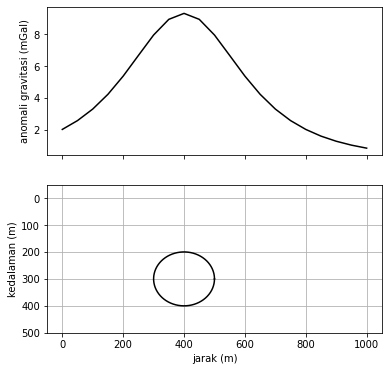

In [4]:
d_obs = f(x0, z0, R, rho)
xb1,yb1 = bola_sphere(x0, z0, R)

# plotting
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,6))

ax1.plot(x,d_obs,'k')
ax1.set_ylabel("anomali gravitasi (mGal)")

ax2.plot(xb1,yb1,'k')
ax2.set_ylim(-50,500)
ax2.grid()
ax2.set_ylabel("kedalaman (m)")
ax2.set_xlabel("jarak (m)")
ax2.invert_yaxis()
plt.show()

In [5]:
# model referensi
m_ref = [50,50] # x0,z0

banyak_iterasi = 25
misfit = np.array([np.inf])

# inversi non linier
for i in range(banyak_iterasi):
    # forward modelling
    d_fm = f(m_ref[0],m_ref[1],R,rho)
    delta_d = d_obs - d_fm
    
    print(m_ref)
    
    # menghitung misfit
    rms = np.sqrt(np.mean(delta_d**2))
    misfit = np.append(misfit, rms)
    
    if np.isclose(misfit[i], misfit[i-1]) or misfit[i] == 0:
        break
    else:
        # matrix jacobi
        turunanx0 = G_konstanta*(4/3)*np.pi*(R**3)*m_ref[1]*rho*2*(x-m_ref[0])/(((x-m_ref[0])**2 + (0-m_ref[1])**2)**(5/2))*10e5
        turunanz0 = G_konstanta*(4/3)*np.pi*(R**3)*m_ref[1]*rho*2*(0-m_ref[1])/(((x-m_ref[0])**2 + (0-m_ref[1])**2)**(5/2))*10e5
        J = np.column_stack([turunanx0, turunanz0])

        # inversi
        m_calc = m_ref + np.linalg.inv((J.T).dot(J)).dot(J.T).dot(delta_d)
        m_ref = m_calc
        

[50, 50]
[49.43895845 76.24926056]
[ 47.29318321 117.77920349]
[ 42.52701883 179.12433575]
[ 66.4371867  264.27722137]
[265.67453934 369.13307865]
[577.85191816 318.31605413]
[332.10177509 338.01066868]
[465.25587155 304.24282627]
[367.38169898 305.592496  ]
[418.25990969 301.65359457]
[390.56438899 300.52775152]
[404.77139517 300.14825324]
[397.60649776 300.03893608]
[401.19771463 300.00992662]
[399.40099596 300.00249827]
[400.29951411 300.00062606]
[399.85023979 300.00015662]
[400.07488009 300.00003917]
[399.96255985 300.00000979]
[400.01872006 300.00000245]
[399.99063997 300.00000061]
[400.00468002 300.00000015]
[399.99765999 300.00000004]
[400.00117    300.00000001]


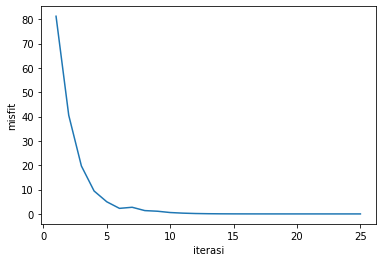

In [7]:
plt.plot(np.arange(len(misfit)), misfit)
plt.ylabel("misfit")
plt.xlabel("iterasi")
plt.show()